In [1]:
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [2]:
emotion_dict = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 :'neutral', 5 : 'sad', 6 :'surprise'}

In [3]:
json_file = open('model/emotional_model_final_cate.json', 'r')
loaded_model= json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model)

emotion_model.load_weights('model/emotional_model_final_cate_weights.h5')
print('loaded_model from disk')

loaded_model from disk


In [4]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
    'dataset/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False 
)

Found 7178 images belonging to 7 classes.


113/113 [==============================] - 23s 135ms/step


[Text(0, 0.5, 'angry'),
 Text(0, 1.5, 'disgust'),
 Text(0, 2.5, 'fear'),
 Text(0, 3.5, 'happy'),
 Text(0, 4.5, 'neutral'),
 Text(0, 5.5, 'sad'),
 Text(0, 6.5, 'surprise')]

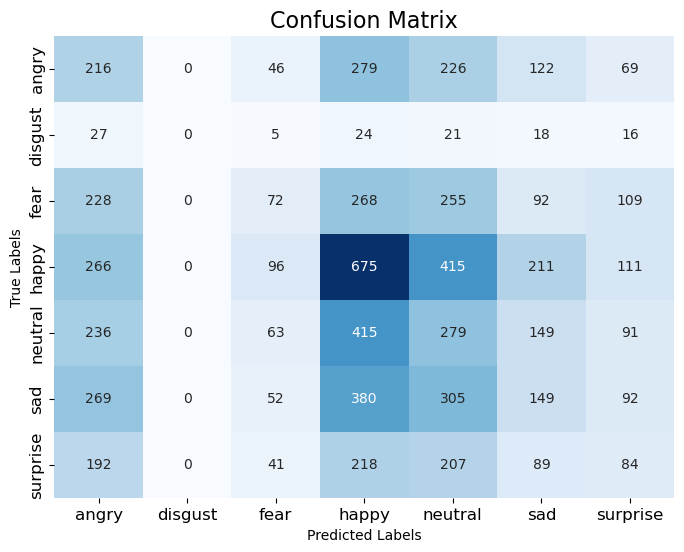

In [5]:
# Get the true labels
true_labels = test_generator.classes
class_indices = test_generator.class_indices
classes_names = list(class_indices.keys())

# Make predictions
predictions = emotion_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
hmap = sns.heatmap(confusion, annot=True, vmin=0,
                   fmt='g', cmap='Blues', cbar=False,
                   xticklabels=classes_names,
                   yticklabels=classes_names)

hmap.set_title('Confusion Matrix', size=16)
hmap.set(xlabel='Predicted Labels', ylabel='True Labels')
hmap.set_xticklabels(classes_names, fontsize=12)
hmap.set_yticklabels(classes_names, fontsize=12)

In [6]:

cap = cv2.VideoCapture('emotion_sample2.mp4')

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()

    if not ret:
        print("End of video or error reading frame.")
        break
    
    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0,255,0), 4)
        roi_frame = frame[y:y + h, x:x + w]
        resized_img = cv2.resize(roi_frame, (224, 224))  
        rgb_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        cropped_img = np.expand_dims(rgb_img, 0)

        
        emotion_pred = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_pred))
        
        
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
    cv2.imshow('Frame', frame)
    
    key = cv2.waitKey(1)
    if key == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 146ms/step
